# Learn all outer folds

In [1]:
import json
import os
from pathlib import Path
import sys
import time

import joblib
import numpy as np
import sklearn.ensemble
import sklearn.feature_selection
import sklearn.metrics
import sklearn.model_selection
from tqdm.auto import tqdm

root = str(Path.cwd().parents[1])
sys.path.append(root)
os.chdir(root)
import src

In [118]:
X, y, s = src.get_Xys()
y = y>0
ys = y + 3*s

skf = sklearn.model_selection.StratifiedKFold(shuffle=True, random_state=42)
folds = list(skf.split(X=X, y=ys))

params = list(
    enumerate(
        [(int(max_depth), n_bins) 
         for max_depth in np.arange(1, 11) for n_bins in (2, 10)]
    )
)

cv = sklearn.model_selection.StratifiedKFold(shuffle=True, random_state=42)

for orthogonality in tqdm(np.linspace(0, 1, 11), position=0):
    outer_splits_ = list(enumerate(cv.split(X=X, y=ys)))
    pbar_outer_fold_ = tqdm(outer_splits_, total=5, leave=False, 
                            desc='outer_fold', position=1)
    for outer_fold, (trainval_indices, test_indices) in tqdm(outer_splits_, leave=False, position=1)
        X_trainval = X[trainval_indices]
        y_trainval = y[trainval_indices]
        s_trainval = s[trainval_indices]
        ys_trainval = ys[trainval_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        s_test = s[test_indices]
    
        for param_index, (max_depth, n_bins) in tqdm(params, position=2):
            assert isinstance(n_bins, int)
            assert isinstance(max_depth, int)
            params_ = {'max_depth': max_depth, 'n_bins': n_bins}
            pbar_params_.set_postfix(params_)
            
            param_performance_ = list()
            inner_splits_ = enumerate(cv.split(X=X_trainval, y=ys_trainval))
            pbar_inner_fold_ = tqdm(inner_splits_, total=5, leave=False, 
                                    position=3, desc='inner_fold')
            for inner_fold, (train_indices, val_indices) in pbar_inner_fold_:              
                filepath_ = f'cache/FRF_v3_B/{max_depth}-{orthogonality:.2f}-{n_bins}-{outer_fold}-{inner_fold}'
                if os.path.isfile(filepath_ + '.pkl'):
                    continue
                X_train = X_trainval[train_indices]
                y_train = y_trainval[train_indices]
                s_train = s_trainval[train_indices]
                X_val = X_trainval[val_indices]
                y_val = y_trainval[val_indices]
                s_val = s_trainval[val_indices]

                vt = sklearn.feature_selection.VarianceThreshold()
                vt.fit(X_train)
                X_train = vt.transform(X_train)
                X_val = vt.transform(X_val) 

                clf = src.FairRandomForestClassifier(
                    n_estimators=100, 
                    n_jobs=100, 
                    orthogonality=orthogonality,
                    **params_
                )
                start_fit = time.time()
                clf.fit(X_train, y_train, s_train)
                clf.fit_time = time.time() - start_fit #type: ignore
                joblib.dump(clf, filepath_ + '.pkl')           

orthogonality:   0%|          | 0/11 [00:00<?, ?it/s]

outer_fold:   0%|          | 0/5 [00:00<?, ?it/s]

params:   0%|          | 0/20 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

params:   0%|          | 0/20 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

params:   0%|          | 0/20 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

params:   0%|          | 0/20 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

params:   0%|          | 0/20 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

outer_fold:   0%|          | 0/5 [00:00<?, ?it/s]

params:   0%|          | 0/20 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

params:   0%|          | 0/20 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

inner_fold:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Predict

In [ ]:
import json
import os
import time

import joblib
import numpy as np
import pandas as pd
import sklearn.ensemble
import sklearn.feature_selection
import sklearn.metrics
import sklearn.model_selection
from tqdm.auto import tqdm

import src

X, y, s = src.get_Xys()
y = y > 0
ys = y + 3*s

skf = sklearn.model_selection.StratifiedKFold(shuffle=True, random_state=42)
folds = list(skf.split(X=X, y=ys))

params = [
    (int(max_depth), n_bins)
    for max_depth in np.arange(1, 11)
    for n_bins in [2]
]

cv = sklearn.model_selection.StratifiedKFold(shuffle=True, random_state=42)

pbar_orthogonality_ = tqdm(np.linspace(0, 1, 11), desc='orthogonality', 
                           position=0)
for orthogonality in pbar_orthogonality_:
    pbar_orthogonality_.set_postfix({'orthogonality': orthogonality})
    
    outer_splits_ = enumerate(cv.split(X=X, y=ys))
    pbar_outer_fold_ = tqdm(outer_splits_, total=5, leave=False, 
                            desc='outer_fold', position=1)
    for outer_fold, (trainval_indices, test_indices) in pbar_outer_fold_:
        X_trainval = X[trainval_indices]
        y_trainval = y[trainval_indices]
        s_trainval = s[trainval_indices]
        ys_trainval = ys[trainval_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        s_test = s[test_indices]
    
        params_performance_ = []
        pbar_params_ = tqdm(enumerate(params), leave=False, total=len(params),
                            desc='params', position=2)
        for param_index, (max_depth, n_bins) in pbar_params_:
            assert isinstance(n_bins, int)
            assert isinstance(max_depth, int)
            params_ = {'max_depth': max_depth, 'n_bins': n_bins}
            pbar_params_.set_postfix(params_)
            param_performance_ = list()
            inner_splits_ = enumerate(cv.split(X=X_trainval, y=ys_trainval))
            pbar_inner_fold_ = tqdm(inner_splits_, total=5, leave=False, 
                                    position=3, desc='inner_fold')
            for inner_fold, (train_indices, val_indices) in pbar_inner_fold_:
                filepath_ = f'cache/FRF_v3_B/{max_depth}-{orthogonality:.2f}-{n_bins}-{outer_fold}-{inner_fold}'
                if os.path.isfile(filepath_ + '.npy'):
                    continue
                X_train = X_trainval[train_indices]
                X_val = X_trainval[val_indices]
                
                vt = sklearn.feature_selection.VarianceThreshold()
                vt.fit(X_train)
                X_train = vt.transform(X_train)
                X_val = vt.transform(X_val)                 
                
                assert os.path.isfile(filepath_ + '.pkl')
                clf = joblib.load(filepath_ + '.pkl')
                y_score = clf.predict_proba(X_val)[:,1] #type: ignore
                np.save(filepath_ + '.npy', y_score)

# Measure performance

In [ ]:
import json
import os

import joblib
import numpy as np
import sklearn.model_selection
from tqdm.auto import tqdm

import src

overwrite=True

X, y, s = src.get_Xys()
y = y>0
ys = y + 3*s

skf = sklearn.model_selection.StratifiedKFold(shuffle=True, random_state=42)
folds = list(skf.split(X=X, y=ys))

iterator = [
    (ortho, int(max_depth), n_bins, fold, train_idx, test_idx) 
    for ortho in np.linspace(0, 1, 11)
    for max_depth in np.arange(1, 11)
    for n_bins in [2]
    for fold, (train_idx, test_idx) in enumerate(folds)
]

def get_measures(y_score, y_test, s_test, threshold):
    return dict(
        tp_b = (y_score >= threshold)[s_test & y_test].sum(),
        fn_b = (y_score >= threshold)[s_test & ~y_test].sum(),
        fp_b = (y_score < threshold)[s_test & y_test].sum(),
        tn_b = (y_score < threshold)[s_test & ~y_test].sum(),
        tp_w = (y_score >= threshold)[~s_test & y_test].sum(),
        fn_w = (y_score >= threshold)[~s_test & ~y_test].sum(),
        fp_w = (y_score < threshold)[~s_test & y_test].sum(),
        tn_w = (y_score < threshold)[~s_test & ~y_test].sum(),
        ppr_b = (y_score >= threshold)[s_test].mean(),
        ppr_w = (y_score >= threshold)[~s_test].mean(),
        disparate_impact = ppr_b / ppr_w if ppr_w != 0 else np.nan,
        disparate_impact_ε = 1 - disparate_impact,
        fpr_w = (y_score < threshold)[~s_test & y_test].mean(),
        fpr_b = (y_score < threshold)[s_test & y_test].mean(),
        tpr_w = (y_score >= threshold)[~s_test & y_test].mean(),
        tpr_b = (y_score >= threshold)[s_test & y_test].mean(),
        equalized_odds_fpr = abs(fpr_w-fpr_b),
        equalized_odds_tpr = abs(tpr_w-tpr_b)
    )
        

threshold_independent_measures = list()
threshold_quantiled_measures = list()

for ortho, max_depth, n_bins, fold, train_idx, test_idx in tqdm(iterator):
    assert isinstance(max_depth, int)
    assert isinstance(n_bins, int)
    filepath = f'cache/FRF_v3_B/{max_depth}-{ortho:.2f}-{n_bins}-{fold}'
    params = dict(fold=fold, max_depth=max_depth, orthogonality=ortho,
                  n_bins)

    if not os.path.isfile(filepath + '.json') or overwrite:
        y_test, s_test = y[test_idx], s[test_idx]

        assert os.path.isfile(filepath + '.npy')
        y_score = np.load(filepath + '.npy')
        
        # Reverse score and y_test!!
        y_score = 1 - y_score
        y_test = (1-y_test).astype(bool)
        
        auc_y = sklearn.metrics.roc_auc_score(y_test, y_score)
        auc_s = sklearn.metrics.roc_auc_score(s_test, y_score)
        auc_s = max(auc_s, 1-auc_s)
        threshold_independent_measures.append(
            {**params, 'auc_y': auc_y, 'auc_s': auc_s}
        )
        for threshold_quantile in [.1, .3, .5, .7, .9]:
            threshold = np.quantile(y_score, threshold_quantile)
            threshold_dependent_measures.append(
                {**params, **get_measure(y_score, y_test, s_test, threshold)}
            )
        
        threshold = np.sort(y_score)[np.sum(~y_test)]

        result_this_run_ = dict(
            fold=fold, max_depth=max_depth, orthogonality=ortho, 
            n_bins=n_bins, auc_y=auc_y, auc_s=auc_s, ppr_b=ppr_b, ppr_w=ppr_w,
            disparate_impact=disparate_impact, fpr_b=fpr_b, fpr_w=fpr_w, 
            tpr_w=tpr_w, tpr_b=tpr_b
        )
        with open(filepath + '.json', 'w') as file:
            json.dump(result_this_run_, file)
    else:
        with open(filepath + '.json') as file:
            result_this_run_ = json.load(file)
    results.append(result_this_run_)
joblib.dump(results, 'cache/FRF_v3_B_nested.pkl')

In [117]:
data

,fold,max_depth,orthogonality,n_bins,auc_y,auc_s,ppr_b,ppr_w,disparate_impact,fpr_b,fpr_w,tpr_w,tpr_b
0,0,1,0.0,2,0.721608,0.596651,0.267081,0.208220,1.282683,0.600000,0.551020,0.448980,0.400000
1,1,1,0.0,2,0.724247,0.605993,0.309598,0.205551,1.506184,0.553571,0.554908,0.445092,0.446429
2,2,1,0.0,2,0.723096,0.591829,0.303406,0.205760,1.474563,0.535714,0.559339,0.440661,0.464286
3,3,1,0.0,2,0.717330,0.564426,0.263158,0.208472,1.262315,0.535714,0.551556,0.448444,0.464286
4,4,1,0.0,2,0.711633,0.567704,0.301242,0.205968,1.462566,0.464286,0.581712,0.418288,0.535714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0,10,1.0,2,0.500000,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
546,1,10,1.0,2,0.500000,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
547,2,10,1.0,2,0.500000,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
548,3,10,1.0,2,0.500000,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000


In [114]:
np.sort(y_score)

AttributeError: 'numpy.ndarray' object has no attribute 'quantile'

In [116]:
np.quantile(y_score, .1)

0.5019437234881562

In [131]:
_, _, s = src.get_Xys(numpy=False)
portcalls = joblib.load('data/portcalls_v3.pkl')
expert_labels = portcalls.groupby('ship')['risk'].max()

result_y = list()
result_s = list()
for fold, (train_idx, test_idx) in enumerate(folds):
    y_score = expert_labels.get(s.iloc[test_idx].index)
    result_y.append(sklearn.metrics.roc_auc_score(y[test_idx], 2-y_score))
    auc_s = sklearn.metrics.roc_auc_score(s[test_idx], 2-y_score)
    result_s.append(max(auc_s, 1-auc_s))
pd.Series(result_y).agg(['mean', 'std'])
pd.Series(result_s).agg(['mean', 'std'])

mean    0.671728
std     0.012746
dtype: float64

# Analysis

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.model_selection

import src

X, y, s = src.get_Xys()
y = y==0
data = pd.DataFrame(pd.read_pickle('cache/FRF_v3_B_nested.pkl'))

base_rate = np.mean(y)
print(f"{base_rate=:.3f}")
base_rate_black = np.mean(y[s])
print(f"{base_rate_black=:.3f}")
base_rate_white = np.mean(y[~s])
print(f"{base_rate_white=:.3f}")
print()
print("Performance")
performance = (
    data
    .sort_values('auc_y', ascending=False)
    .loc[lambda x: x.orthogonality.round(1) == .7]
    .groupby(['fold'])
    .first()
    .agg({'auc_y': ['mean', 'std'], 'auc_s': ['mean', 'std']})
)
display(performance.round(4))

base_rate=0.212
base_rate_black=0.173
base_rate_white=0.215

Performance


,auc_y,auc_s
mean,0.7782,0.5381
std,0.0072,0.0116


In [105]:
selected_params = (
    pd.DataFrame(pd.read_pickle('cache/FRF_v3_B_nested.pkl'))
    .sort_values('auc_y', ascending=False)
    .groupby(['fold', 'orthogonality'])
    .first()
    .reset_index()
    [['fold', 'orthogonality', 'max_depth', 'n_bins']]
)
selected_params

In [108]:
results = (
    pd.merge(selected_params, data, how='left')
    .groupby('orthogonality')
    .agg({'auc_y': 'mean', 'auc_s': 'mean', 'ppr_b': 'mean', 'ppr_w': 'mean', 'fpr_b': 'mean', 'fpr_w': 'mean', 'tpr_w': 'mean', 'tpr_b': 'mean'})
    .reset_index()
)
results

,orthogonality,auc_y,auc_s,ppr_b,ppr_w,fpr_b,fpr_w,tpr_w,tpr_b
0,0.0,0.814402,0.626898,0.305665,0.205668,0.419545,0.455465,0.544535,0.580455
1,0.1,0.813765,0.617525,0.292024,0.206586,0.433896,0.457409,0.542591,0.566104
2,0.2,0.812861,0.607162,0.282722,0.207212,0.415909,0.462855,0.537145,0.584091
3,0.3,0.808551,0.595170,0.272173,0.207921,0.433766,0.475301,0.524699,0.566234
4,0.4,0.804721,0.582492,0.267844,0.208213,0.423052,0.481133,0.518867,0.576948
5,0.5,0.801250,0.569496,0.253566,0.209173,0.448117,0.486191,0.513809,0.551883
6,0.6,0.790772,0.554498,0.243644,0.209841,0.480455,0.494749,0.505251,0.519545
7,0.7,0.778215,0.538136,0.229387,0.210926,0.509026,0.506610,0.493390,0.490974
8,0.8,0.767133,0.529858,0.230625,0.210717,0.487727,0.511666,0.488334,0.512273
9,0.9,0.755972,0.527628,0.225052,0.211135,0.530584,0.514000,0.486000,0.469416


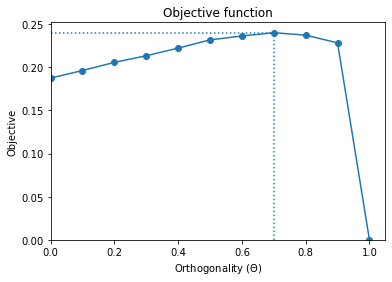

In [111]:
plt.title("Objective function")
plt.plot(results.orthogonality, results.auc_y-results.auc_s, marker='o')
idx_star = (results.auc_y-results.auc_s).idxmax()
x_star = results.loc[idx_star, 'orthogonality']
y_star = (results['auc_y']-results['auc_s']).max()
plt.vlines(x_star, 0, ymax=y_star, ls=':')
plt.hlines(y_star, 0, xmax=x_star, ls=':')
plt.xlim(0)
plt.ylim(0)
plt.xlabel(r"Orthogonality ($\Theta$)");
plt.ylabel("Objective");

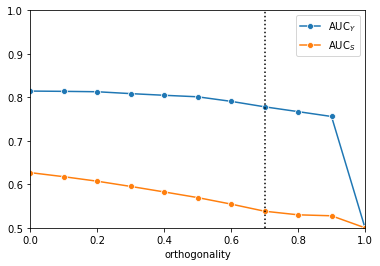

In [112]:
sns.lineplot(data=results, x='orthogonality', y='auc_y', label=r'$\mathrm{AUC}_Y$', marker='o')
sns.lineplot(data=results, x='orthogonality', y='auc_s', color='C1', label=r'$\mathrm{AUC}_S$', marker='o')
plt.xlim(0, 1)
plt.ylim(.5, 1)
plt.xlabel('orthogonality')
plt.ylabel('')
plt.axvline(x_star, color='black', ls=':');

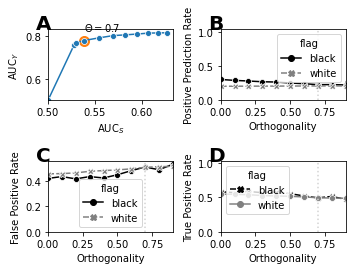

In [54]:
data_b = pd.concat(
    [
        results[['ppr_b', 'orthogonality']].rename(columns={'ppr_b': 'value'}).assign(flag='black'),
        results[['ppr_w', 'orthogonality']].rename(columns={'ppr_w': 'value'}).assign(flag='white')
    ],
    ignore_index=True
)
data_c = pd.concat(
    [
        results[['fpr_w', 'orthogonality']].rename(columns={'fpr_w': 'value'}).assign(flag='white'),
        results[['fpr_b', 'orthogonality']].rename(columns={'fpr_b': 'value'}).assign(flag='black'),
    ],
    ignore_index=True
)
data_d = pd.concat(
    [
        results[['tpr_w', 'orthogonality']].rename(columns={'tpr_w': 'value'}).assign(flag='white'),
        results[['tpr_b', 'orthogonality']].rename(columns={'tpr_b': 'value'}).assign(flag='black')
    ],
    ignore_index=True
)
order = ['black', 'white']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5, 3.75))

sns.lineplot(data=data, x='auc_s', y='auc_y', marker='o', ax=ax1)
ax1.set_xlim(.5)
ax1.set_ylim(.5)
ax1.set_xlabel(r'$\mathrm{AUC}_S$')
ax1.set_ylabel(r'$\mathrm{AUC}_Y$')
auc_s_star = data.loc[idx_star, 'auc_s']
auc_y_star = data.loc[idx_star, 'auc_y']
ys_star = (auc_s_star, auc_y_star)
ax1.scatter(*ys_star , c='C1', s=100)
ax1.annotate(rf'$\Theta={x_star:.1f}$', ys_star, (0, 10), textcoords='offset points')
ax1.text(-.1, 1.0, 'A', transform=ax1.transAxes, size=20, weight='bold')

sns.lineplot(data=data_b, 
             x='orthogonality', y='value', hue='flag', style='flag', 
             ax=ax2, markers=True, palette=['black', 'grey'], hue_order=order)
ax2.axvline(x_star, ls=':', color='lightgrey')
ax2.set_xlim(0, .9)
ax2.set_ylim(0)
ax2.set_xlabel('Orthogonality')
ax2.set_ylabel('Positive Prediction Rate')
ax2.text(-.1, 1.0, 'B', transform=ax2.transAxes, size=20, weight='bold')

sns.lineplot(data=data_c, 
             x='orthogonality', y='value', hue='flag', style='flag', 
             ax=ax3, markers=True, palette=['black', 'grey'], 
             hue_order=order, style_order=order)
ax3.axvline(x_star, ls=':', color='lightgrey')
ax3.set_xlim(0, .9)
ax3.set_ylim(0)
ax3.set_xlabel('Orthogonality')
ax3.set_ylabel('False Positive Rate')
ax3.text(-.1, 1.0, 'C', transform=ax3.transAxes, size=20, weight='bold')

sns.lineplot(data=data_d, 
             x='orthogonality', y='value', hue='flag', style='flag', 
             ax=ax4, markers=True, palette=['black', 'grey'], 
             hue_order=order)
ax4.axvline(x_star, ls=':', color='lightgrey')
ax4.set_xlim(0, .9)
ax4.set_ylim(0)
ax4.set_xlabel('Orthogonality')
ax4.set_ylabel('True Positive Rate')
ax4.text(-.1, 1.0, 'D', transform=ax4.transAxes, size=20, weight='bold')
plt.tight_layout()
plt.savefig('fig/fairness.pdf')